<a href="https://colab.research.google.com/github/Olmaro/Olmaro/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Olivia Roberts**
food_sales_predictions

#**Week 1**

## 1) Use Pandas to read in the sales prediction data set into a Google Colab Notebook and verify the data by using the df.head() command.

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
filename = '/content/drive/MyDrive/Coding Dojo/Portfolio/sales_predictions.csv'

In [ ]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#**Week 2**





##Your data should already be loaded into your notebook from part 1 of the project.

####Here is the **Data Dictionary** for this dataset:

  **Variable Name:	Description**
   - **Item_Identifier:**	Unique product ID
   - **Item_Weight	Weight:** of product
   - **Item_Fat_Content:**	Whether the product is low fat or regular
   - **Item_Visibility:**	The percentage of total display area of all products in are  located to the particular product
   - **Item_Type:**	The category to which the product belongs
   - **Item_MRP:**	Maximum Retail Price (list price) of the product
   - **Outlet_Identifier:**	Unique store ID
   - **Outlet_Establishment_Year:**	The year in which store was established
   - **Outlet_Size:**	The size of the store in terms of ground area covered
   - **Outlet_Location_Type:**	The type of area in which the store is located
   - **Outlet_Type:**	Whether the outlet is a grocery store or some sort of supermarket
   - **Item_Outlet_Sales:**	Sales of the product in the particular store. This is the  target variable to be predicted.

###**Explore the data** - what do you need to do to clean this data? Clean it!  
###**Be sure to address each of the following tasks:**


##1) How many rows and columns?

In [ ]:
#Running shape attribute to see how many rows and columns we are working with.
# 8523 rows x 12 columns
df.shape

(8523, 12)

##2) What are the datatypes of each variable?



In [ ]:
#running dtypes to locate all datatypes efficently
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##3) Are there duplicates? If so, drop any duplicates.


In [ ]:
#running duplicated and sum to see there are no duplicates... I hope! ;)
df.duplicated().sum()

0

##4) Identify missing values.


In [ ]:
#Locating columns with missing data/"NaN" and "summing" to locate areas requiring attention
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).


In [ ]:
#I decided to remove the 'Item Weight' Column as it seemed unnecessary to predicting the sales and highly difficult to calculate the correct data for 1463 items.
df.drop(columns='Item_Weight', inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# For the 'Outlet_Size', I do not know if this information is necesssary or not. The simplest solution appears to be to fill the missing instances wiht'Missing" so it does not cause furhter issue.
df['Outlet_Size'].fillna('Missing', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##6) Confirm that there are no missing values after addressing them.


In [ ]:
#Running df to confirm all of my changes have been made.
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


##7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 


In [ ]:
#After review, it appears that 'Item Fat Content' is the only column with incon. data.
#Inititally, I was going to try to individually correct eavh of these instances of incon. data.
df.loc[28, 'Item Fat Content'] = 'Low Fat'

In [ ]:
#I then decided that was a waste of my *very precious* time, and "Googled around" until i found the solution of using a data dictionary.
#Below I ran the value counts to view each of the incon. values that would need to be added to the data dict.
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#data dictionary being utilized to replace each of the incon. values.
#running the new df utilizing the  data dict.
dict = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}
df_consistent=df.replace({'Item_Fat_Content': dict})
df_consistent

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item Fat Content
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,NaN
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,NaN
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850,NaN
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NaN
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,NaN


In [ ]:
#confirming new df only containts 2 values in the 'Item Fat Content' column.
df_consistent['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [ ]:
# Agregating the available statistics.
df_consistent.agg(
       {
        'Item_Visibility': ["min", "max", "mean", ],
        'Item_MRP': ["min", "max", "mean", ],
        'Outlet_Establishment_Year': ["min", "max", "mean", ],
        'Item_Outlet_Sales': ["min", "max", "mean", ],
    }
)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,0.000000,31.290000,1985.000000,33.290000
max,0.328391,266.888400,2009.000000,13086.964800
mean,0.066132,140.992782,1997.831867,2181.288914


#**Week 3**


###For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:



### - **Histogram** to view the distributions of various features in your dataset.

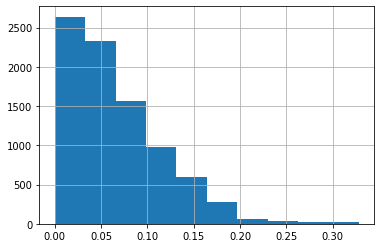

In [ ]:
df['Item_Visibility'].hist()

### - **Boxplot** to view statistical summaries of various features in your dataset.


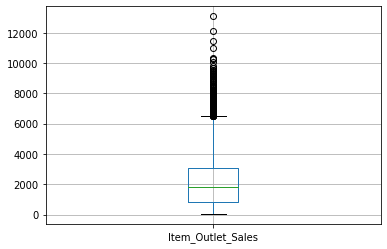

In [ ]:
df.boxplot(column= 'Item_Outlet_Sales');

### - **Heatmap** of the correlation between features.

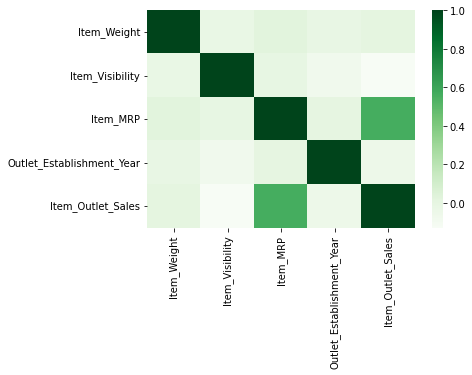

In [ ]:
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens')

#**Week 4**